In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from image_extractor import preprocess_hsv, seperate_chanel, statistic_analysis, init_lut, linear_fn, curved

from scipy.stats import skew, kurtosis

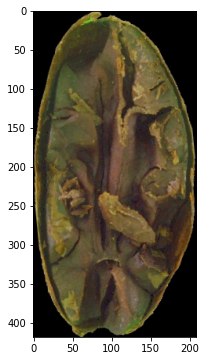

In [2]:
# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (2).JPG'
# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Brittle/image (87).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Purple/image (10).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Purple/image (100).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_White/image (23).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_White/image (72).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Slaty/image (71).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Slaty/image (56).JPG'
image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Brown/image (3).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Moldered/image (7).JPG'

# plt.rcParams['figure.dpi'] = 102.46
plt.rcParams["figure.figsize"] = (6,6)
lut1 = init_lut(fn=linear_fn, coefficient=15)
lut2 = init_lut(fn=curved, coefficient=1.5)

image = cv2.imread(image_dir)
image_hsv , cnt, ell= preprocess_hsv(image, lut1, lut2)
image_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(image_rgb)
plt.show()

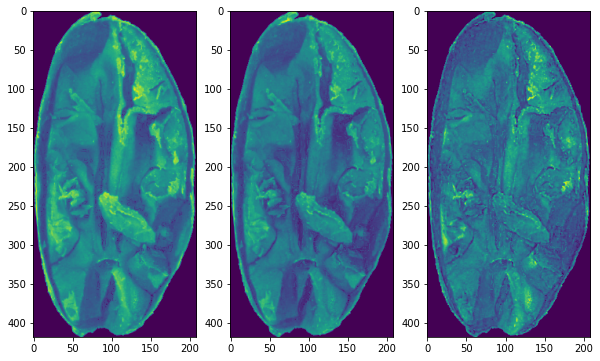

In [3]:
# h,s,v = cv2.split(image_hsv)
plt.rcParams["figure.figsize"] = (10,6)
r,g,b = seperate_chanel(image_rgb, plot=True)

In [4]:
#gamma correct

In [5]:
plt.rcParams["figure.figsize"] = (10,6)

clahe1 = cv2.createCLAHE(1, (8,8))
clahe2 = cv2.createCLAHE(6, (8,8))

# clahe_r = clahe1.apply(r)
# clahe_g = clahe2.apply(g)
# clahe_b = clahe2.apply(b)
# plt.subplot(1,3,1)
# plt.imshow(clahe_r)
# plt.subplot(1,3,2)
# plt.imshow(clahe_g)
# plt.subplot(1,3,3)
# plt.imshow(clahe_b)

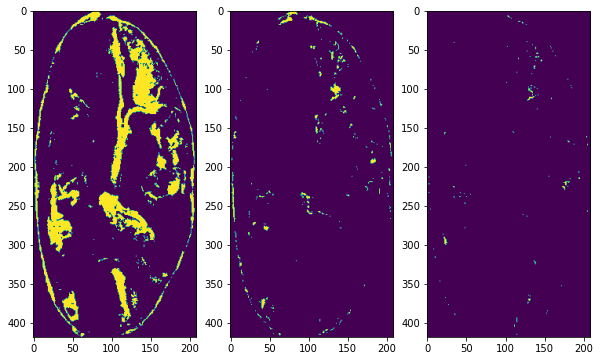

In [6]:
plt.rcParams["figure.figsize"] = (10,6)
# ret, thr = cv2.threshold(r, 180, 255, cv2.THRESH_TOZERO)
# ret, thg = cv2.threshold(g, 200, 255, cv2.THRESH_TOZERO)
# ret, thb = cv2.threshold(b, 180, 255, cv2.THRESH_TOZERO)

ret, thr = cv2.threshold(r, 120, 255, cv2.THRESH_BINARY)
ret, thg = cv2.threshold(g, 135, 255, cv2.THRESH_BINARY)
ret, thb = cv2.threshold(b, 100, 255, cv2.THRESH_BINARY)

plt.subplot(1,3,1)
plt.imshow(thr)
plt.subplot(1,3,2)
plt.imshow(thg)
plt.subplot(1,3,3)
plt.imshow(thb)

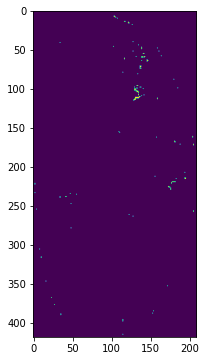

In [7]:
plt.rcParams["figure.figsize"] = (6,6)

meg = np.min([thr,thg,thb], axis=0)

plt.imshow(meg)

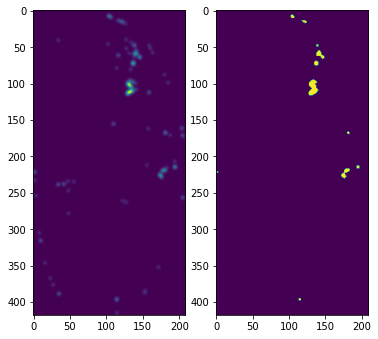

In [8]:
blur = cv2.GaussianBlur(meg, (11,11),0)
plt.subplot(1,2,1)
plt.imshow(blur)

ret, blur = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
plt.subplot(1,2,2)
plt.imshow(blur)
plt.show()

6


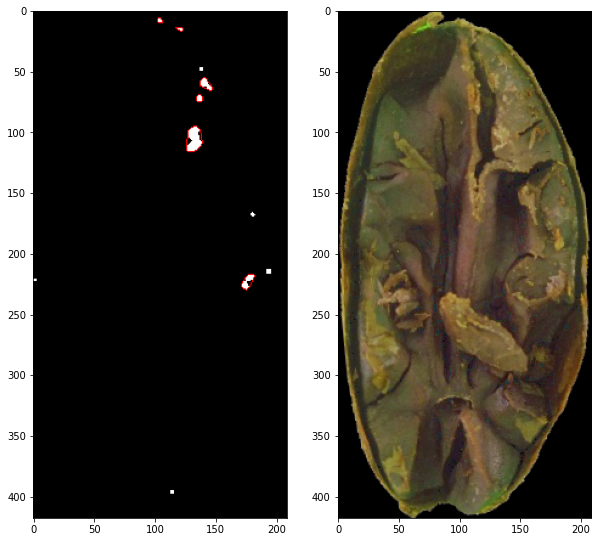

In [9]:
plt.rcParams["figure.figsize"] = (10,10)
contours, hir = cv2.findContours(blur, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
hei,wid = np.shape(blur)
blur = cv2.cvtColor(blur, cv2.COLOR_GRAY2RGB)
shape = []
stat = []
for cnt in contours:
	x,y,w,h = cv2.boundingRect(cnt)
	convexHull = cv2.convexHull(cnt)
	convexhull_area = cv2.contourArea(convexHull)
	if convexhull_area < 9:
		continue
	if len(cnt)<5:
		continue
	if len(convexHull)<5:
		continue

	rect = cv2.minAreaRect(convexHull)
	(x2,y2),(w2,h2),o = rect
	r = w2/h2
	if (r>3) or (r<0.333):
		continue
	feature = image_rgb[y:y+h, x:x+w, :]
	stat.append(statistic_analysis(feature))
	shape.append([w,h])
	cv2.drawContours(blur, [convexHull], -1, (255,0,0), 1)

n = len(stat)
print(n)

plt.subplot(1,2,1)
plt.imshow(blur)
plt.subplot(1,2,2)
plt.imshow(image_rgb)
plt.show()


In [10]:
print(np.shape(shape))
print(np.shape(stat))
ft = np.concatenate([shape, stat], axis=1)
print(type(ft))
print(np.shape(ft))
ft = ft.tolist()

(6, 2)
(6, 12)
<class 'numpy.ndarray'>
(6, 14)


In [11]:
mean = np.mean(ft, axis=0)
stddev = np.std(ft,axis=0)
skewness = skew(ft,axis=0)
kurtosises = kurtosis(ft,axis=0)

